In [29]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm


threshold = 0.05

global_mafs = []
samples_above_threshold = []

with gzip.open("assets/Dryad/new_1kg_nyc_hg38_filt_total.biallelic_snps.pops.freq.total.txt.gz",'r') as f:
    header = f.readline()
    for line in tqdm(f):
        freqs = np.array(line.split()[5:]).astype(np.float64)
        global_mafs.append(freqs[0])
        samples_above_threshold.append((freqs[1:] >= threshold).sum())

91796529it [22:34, 67766.68it/s]


(array([85329902.,  1516488.,   973573.,   761113.,   652086.,   579347.,
          531598.,   501587.,   479188.,   471647.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <BarContainer object of 10 artists>)

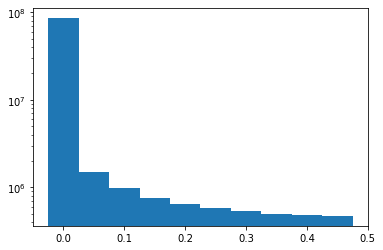

In [313]:
plt.yscale('log')
plt.hist(global_mafs, align="left")

(array([78912789.,  1699746.,   869178.,   641781.,   552558.,   573888.,
          590306.,  1345224.,   291042.,   178004.,   162290.,   149663.,
          164385.,   157727.,   163090.,   156863.,   153661.,   156246.,
          168942.,   231974.,   275241.,   341160.,   205586.,   198291.,
          226548.,   367061.,  2863285.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 <BarContainer object of 27 artists>)

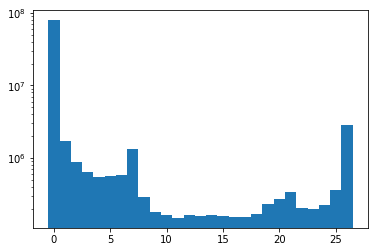

In [314]:
plt.yscale('log')
plt.hist(samples_above_threshold, bins=27, align="left", range=(0,27))

In [67]:
import pandas as pd

In [68]:
mafs_and_sample_counts = pd.DataFrame({"mafs": global_mafs, "sample_counts": samples_above_threshold})

In [297]:
mafs_and_sample_counts["maf_bin"] = pandas.cut(mafs_and_sample_counts["mafs"], 20, labels=np.linspace(0.05,0.5,20))

In [298]:
bins_and_sample_counts = mafs_and_sample_counts.drop("mafs", axis=1)

In [299]:
grouped_counts = bins_and_sample_counts.groupby("maf_bin", as_index=False).value_counts()

In [300]:
def calc_bottom(row, df):
    return grouped_counts.where(grouped_counts["maf_bin"] == row["maf_bin"]).where(grouped_counts["sample_counts"] < row["sample_counts"])["count"].sum()

grouped_counts["bottom"] = grouped_counts.apply(lambda row: calc_bottom(row, df=grouped_counts), axis=1)

<BarContainer object of 540 artists>

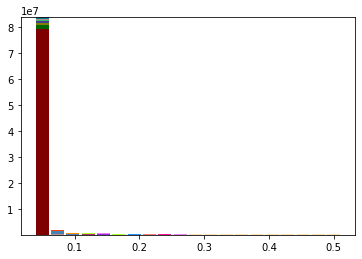

In [332]:
colors = [
    "#7f0000",
    "#006400",
    "#808000",
    "#483d8b",
    "#3cb371",
    "#bc8f8f",
    "#008080",
    "#4682b4",
    "#00008b",
    "#8b008b",
    "#b03060",
    "#ff4500",
    "#ff8c00",
    "#ffd700",
    "#00ff00",
    "#8a2be2",
    "#00ff7f",
    "#00ffff",
    "#0000ff",
    "#adff2f",
    "#ff00ff",
    "#1e90ff",
    "#fa8072",
    "#b0e0e6",
    "#ff1493",
    "#ee82ee",
    "#ffdead"
]


cmap = plt.colormaps["tab20c"]
#plt.ylim(1e5,2e8)
plt.bar(grouped_counts["maf_bin"], grouped_counts["count"], bottom=grouped_counts["bottom"], color=grouped_counts["sample_counts"].apply(lambda x: colors[x]), width=0.020, linewidth=0)






In [333]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm


global_mafs = []
samples_above_010 = []
samples_above_005 = []
samples_above_001 = []

with gzip.open("assets/Dryad/new_1kg_nyc_hg38_filt_total.biallelic_snps.pops.freq.total.txt.gz",'r') as f:
    header = f.readline()
    for line in tqdm(f):
        freqs = np.array(line.split()[5:]).astype(np.float64)
        global_mafs.append(freqs[0])
        samples_above_010.append((freqs[1:] >= 0.10).sum())
        samples_above_005.append((freqs[1:] >= 0.05).sum())
        samples_above_001.append((freqs[1:] >= 0.01).sum())

91796529it [35:06, 43567.63it/s]


(array([82753789.,   883108.,   503527.,   378820.,   325103.,   362773.,
          368838.,   810595.,   201465.,   160229.,   154090.,   146330.,
          156212.,   157188.,   162650.,   154086.,   147817.,   152091.,
          166997.,   266387.,   270499.,   282272.,   188209.,   183510.,
          215415.,   344967.,  1899562.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 <BarContainer object of 27 artists>)

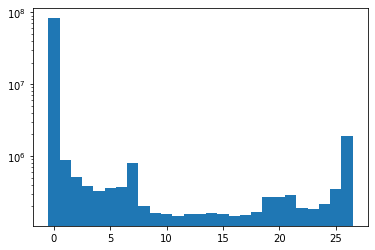

In [335]:
plt.yscale('log')
plt.hist(samples_above_010, bins=27, align="left", range=(0,27))

(array([78912789.,  1699746.,   869178.,   641781.,   552558.,   573888.,
          590306.,  1345224.,   291042.,   178004.,   162290.,   149663.,
          164385.,   157727.,   163090.,   156863.,   153661.,   156246.,
          168942.,   231974.,   275241.,   341160.,   205586.,   198291.,
          226548.,   367061.,  2863285.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 <BarContainer object of 27 artists>)

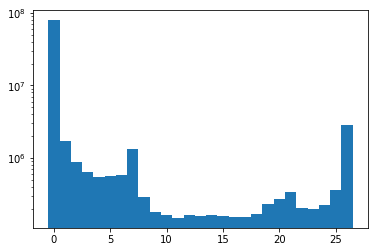

In [336]:
plt.yscale('log')
plt.hist(samples_above_005, bins=27, align="left", range=(0,27))

(array([59118562., 10339628.,  3155631.,  2057139.,  1676392.,  1592765.,
         1384391.,  2032578.,  1326948.,   828782.,   477772.,   284648.,
          208969.,   196159.,   193215.,   189058.,   189318.,   169948.,
          167823.,   187823.,   241286.,   442278.,   270588.,   219244.,
          235994.,   349809.,  4259781.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27.]),
 <BarContainer object of 27 artists>)

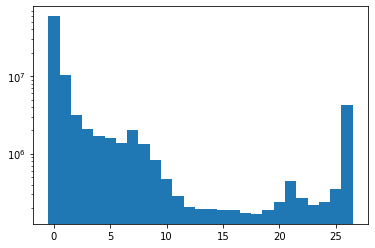

In [337]:
plt.yscale('log')
plt.hist(samples_above_001, bins=27, align="left", range=(0,27))